In [1]:
from Bio import SeqIO
import numpy as np
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
def hamming_distance(s1, s2):
    if len(s1) != len(s2):
        raise ValueError("Strand lengths are not equal!")
    return sum(ch1 != ch2 for ch1,ch2 in zip(s1,s2))

In [3]:
seqList=[]

In [4]:
for record in SeqIO.parse("HW2.fas", "fasta"):
    seqList.append(record.seq)

In [5]:
hdList=[]

In [6]:
for x in seqList:
    for y in seqList:
        hdList.append(hamming_distance(x,y))

In [7]:
len(hdList)

14400

In [8]:
matrix=np.array(hdList)
matrix

array([ 0,  1,  1, ..., 28, 28,  0])

In [9]:
matrix.shape

(14400,)

In [10]:
matrix=matrix.reshape(120,120)

In [11]:
matrix

array([[ 0,  1,  1, ..., 76, 74, 79],
       [ 1,  0,  2, ..., 77, 75, 80],
       [ 1,  2,  0, ..., 77, 75, 80],
       ...,
       [76, 77, 77, ...,  0,  4, 28],
       [74, 75, 75, ...,  4,  0, 28],
       [79, 80, 80, ..., 28, 28,  0]])

In [12]:
embedding=MDS(n_components = 2)

In [13]:
xtransform=embedding.fit_transform(matrix[:120])

C:\Users\Juney\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [14]:
xtransform.shape

(120, 2)

In [15]:
xtransform

array([[ 336.21717018,  139.40752686],
       [ 338.25587276,  141.05911055],
       [ 338.49797387,  140.71737312],
       [ 342.41338996,  140.03250948],
       [ 342.27105178,  141.01730558],
       [ 327.65043255,  135.70759135],
       [ 338.61807982,  140.5400141 ],
       [ 334.93867641,  144.37553733],
       [ 338.10443632,  141.5667336 ],
       [ 334.9887192 ,  149.65042408],
       [ 337.50040771,  136.34222127],
       [ 341.83227748,  141.19036268],
       [ 332.16003933,  135.74159982],
       [ 338.12264207,  141.22257478],
       [ 338.37795136,  140.89058049],
       [ 332.4019961 ,  137.73938878],
       [ 318.17774657,  279.15373086],
       [ 315.40943539,  284.79806639],
       [ 310.49883246,  279.81182995],
       [ 318.91047806,  275.56563622],
       [ 314.86295133,  285.16771371],
       [ 315.70391649,  284.46043971],
       [ 315.57390027,  277.63251426],
       [ 315.3587506 ,  281.29820653],
       [ 308.43046049,  286.96651924],
       [ 315.34355635,  2

In [16]:
df=pd.DataFrame(xtransform)
df

,0,1
0,336.217170,139.407527
1,338.255873,141.059111
2,338.497974,140.717373
3,342.413390,140.032509
4,342.271052,141.017306
...,...,...
115,-255.682193,30.256451
116,-249.800299,46.610450
117,-276.831661,-55.966503
118,-258.829076,-61.365539


In [17]:
x=df[0]

In [18]:
y=df[1]

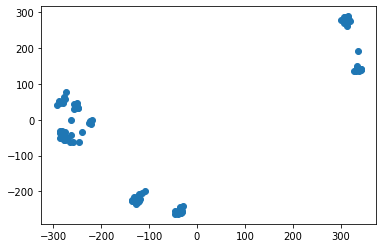

In [19]:
plt.scatter(x,y)

Estimate: K=3

In [20]:
kmeans=KMeans(n_clusters=3, random_state=0).fit(df)

In [21]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
kmeans=kmeans.cluster_centers_

In [23]:
df=pd.DataFrame(kmeans)
df

,0,1
0,-81.719625,-237.042542
1,322.500102,224.834823
2,-265.588176,-5.087267


In [24]:
x=df[0]

In [25]:
y=df[1]

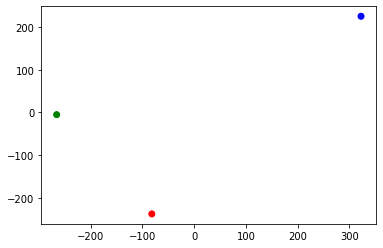

In [26]:
plt.scatter(x,y, c=['red','blue','green'])